Different Kinds of complaints about issues such as noise, illegal parking and bloacked road ways are submitted by affected individuals to aurthorities.

Tha nature of complaints and details of the site at which it occured are recorded. In this work, total number of complaits in respective cities will be analysed. The spread of complaints across the city of Brooklyn will be conducted so as to see where the complaints are highly prevalent. The most frequent complaint per city will also be checked. The resolution time of complaints will be analysed so as to understand the the time it takes for as issue to be resolved.

Before analysing the data, the data will be cleaned by handling all the missing variables and removing of unnecessary data.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [3]:
# Check the first 5 variables
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Identify the shape of the dataset
df.shape

(364558, 53)

In [5]:
# Identify variables with null values
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [6]:
# Check the the number unique values for each variable
nunique_values = df.nunique() 
nunique_values

Unique Key                        364558
Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough         

In [7]:
# Extract numnerical data from the dataset
numerical_data = df.select_dtypes(include=[np.number])
numerical_data.head()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
0,32310363,10034.0,1005409.0,254678.0,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501
1,32309934,11105.0,1007766.0,221986.0,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094
2,32309159,10458.0,1015081.0,256380.0,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525
3,32305098,10461.0,1031740.0,243899.0,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379
4,32306529,11373.0,1019123.0,206375.0,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170


In [8]:
# Extract categorical data from the data set
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,...,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Location
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.733059618956815, -73.87416975810375)"


In [9]:
# Drop irrevant variables in numerical data set
numerical_data = numerical_data.drop(columns = ['Unique Key','Incident Zip', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 
                    'Garage Lot Name', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
                                               'Taxi Pick Up Location'])
numerical_data

,Latitude,Longitude
0,40.865682,-73.923501
1,40.775945,-73.915094
2,40.870325,-73.888525
3,40.835994,-73.828379
4,40.733060,-73.874170
...,...,...
364553,40.695145,-73.860949
364554,40.867830,-73.907178
364555,40.821647,-73.950873
364556,40.886361,-73.853290


In [10]:
# Treating missing values in numerical data
numerical_data.isnull().sum()

Latitude     4030
Longitude    4030
dtype: int64

In [11]:
# Columns for numerical data set
numerical_data.columns

Index(['Latitude', 'Longitude'], dtype='object')

In [12]:
# Handling the missing values in the numerical dataset
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
median_imputer = median_imputer.fit(numerical_data)
imputed_df = median_imputer.transform(numerical_data.values)
numerical_data = pd.DataFrame(data=imputed_df, columns = ['Latitude', 'Longitude'])
numerical_data.head()

C:\Users\johns\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,Latitude,Longitude
0,40.865682,-73.923501
1,40.775945,-73.915094
2,40.870325,-73.888525
3,40.835994,-73.828379
4,40.733060,-73.874170


In [13]:
# Check for missing values again
numerical_data.isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [14]:
# Combine numerical values and categorical values
combined_data = pd.concat([categorical_data, numerical_data], axis = 1)
combined_data

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Location,Latitude,Longitude
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,27 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.69514470265117, -73.86094888534394)",40.695145,-73.860949
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.86782963689454, -73.90717786644662)",40.867830,-73.907178
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.821646626438095, -73.95087342885292)",40.821647,-73.950873
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,"(40.88636077906953, -73.85329048666742)",40.886361,-73.853290


In [15]:
# Identifying missing values in categorical dataset
combined_data.isnull().sum()

Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough                                0
Park Facility Name                     0
Park Borough    

In [16]:
# Check unique values
nunique_values = combined_data.nunique()
nunique_values

Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough                                6
Park Facility Name                     2
Park Borough    

In [17]:
# Drop variables with significantly higher number of nans
combined_data = combined_data.drop(columns = ['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 
                                        'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Bridge Highway Name',
                                        'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Ferry Direction',
                                        'Ferry Terminal Name', 'Location', 'School Zip', 'School Phone Number', 'School Code', 
                                        'Resolution Action Updated Date', 'Due Date', 'Descriptor', 'Address Type'])
combined_data.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,City,Facility Type,Status,Resolution Description,...,Park Borough,School Name,School Number,School Region,School Address,School City,School State,School Not Found,Latitude,Longitude
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Precinct,Closed,The Police Department responded and upon arriv...,...,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,ASTORIA,Precinct,Closed,The Police Department responded to the complai...,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,BRONX,Precinct,Closed,The Police Department responded and upon arriv...,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,BRONX,Precinct,Closed,The Police Department responded to the complai...,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,ELMHURST,Precinct,Closed,The Police Department responded and upon arriv...,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170


In [18]:
# Check the null values again
combined_data.isnull().sum()

Created Date                 0
Closed Date               2381
Agency                       0
Agency Name                  0
Complaint Type               0
Location Type              133
City                      2997
Facility Type             2389
Status                       0
Resolution Description       0
Community Board              0
Borough                      0
Park Facility Name           0
Park Borough                 0
School Name                  0
School Number                0
School Region                1
School Address               0
School City                  0
School State                 0
School Not Found             0
Latitude                     0
Longitude                    0
dtype: int64

In [19]:
# handle missing values in closed date variable
combined_data = combined_data.dropna(subset=['Closed Date'])

In [20]:
# Check missing values again
categorical_data.isnull().sum()

Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough                                0
Park Facility Name                     0
Park Borough    

In [21]:
# Check the first 5 variables of dataset
combined_data.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Location Type', 'City', 'Facility Type', 'Status',
       'Resolution Description', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Address', 'School City', 'School State',
       'School Not Found', 'Latitude', 'Longitude'],
      dtype='object')

In [22]:
# Fill missing values with most frequent value
combined_data = combined_data.fillna(combined_data.mode().iloc[0])

In [23]:
# Check whether missing values are still available in the data set
combined_data.isnull().sum()

Created Date              0
Closed Date               0
Agency                    0
Agency Name               0
Complaint Type            0
Location Type             0
City                      0
Facility Type             0
Status                    0
Resolution Description    0
Community Board           0
Borough                   0
Park Facility Name        0
Park Borough              0
School Name               0
School Number             0
School Region             0
School Address            0
School City               0
School State              0
School Not Found          0
Latitude                  0
Longitude                 0
dtype: int64

In [24]:
df = combined_data.groupby('City')['Complaint Type'].count().reset_index(name='Count')
df.head()

,City,Count
0,ARVERNE,259
1,ASTORIA,7991
2,Astoria,905
3,BAYSIDE,1550
4,BELLEROSE,487


Text(0.5, 1.0, 'Citywise complaints')

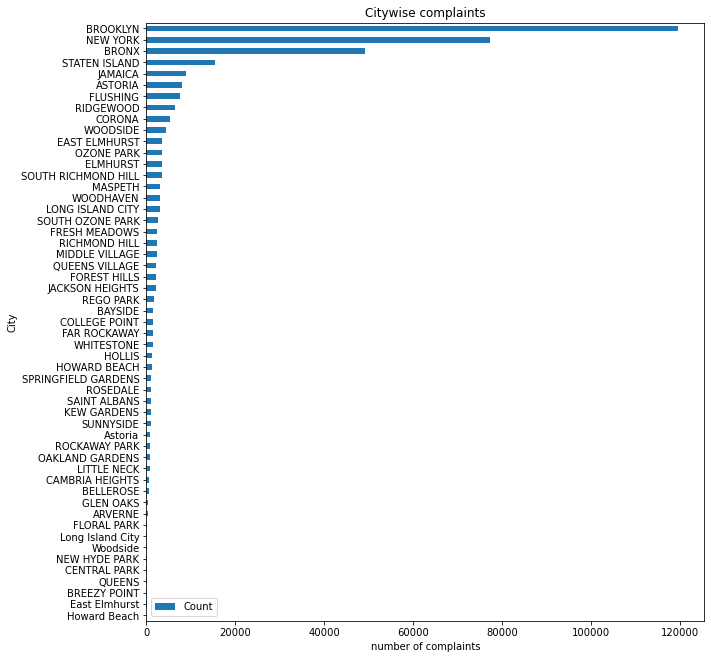

In [25]:
# Show a frequency plot of city wise complaints

# set index, keep column
df = df.set_index('City', drop=False)
df.sort_values('Count', axis = 0, ascending = True).plot(kind='barh', figsize=(10, 11), stacked=True)
plt.xlabel('number of complaints')
plt.title('Citywise complaints')

It can be seen that Brooklyn has the high total number of complaints amongts all cities

<AxesSubplot:title={'center':'Complaints concentration across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

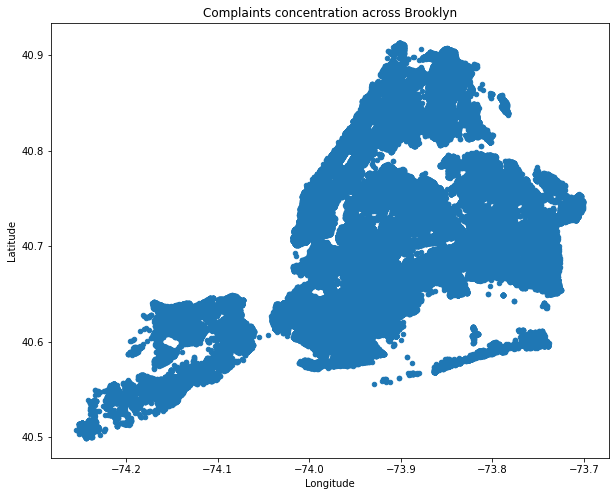

In [26]:
# Draw scatter plot showing complaints concentration across Brooklyn
combined_data[['Longitude', 'Latitude']].plot(kind='scatter', x = 'Longitude', y = 'Latitude', figsize=(10, 8), title =
                                             'Complaints concentration across Brooklyn')

<AxesSubplot:title={'center':'Complaints conentration across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

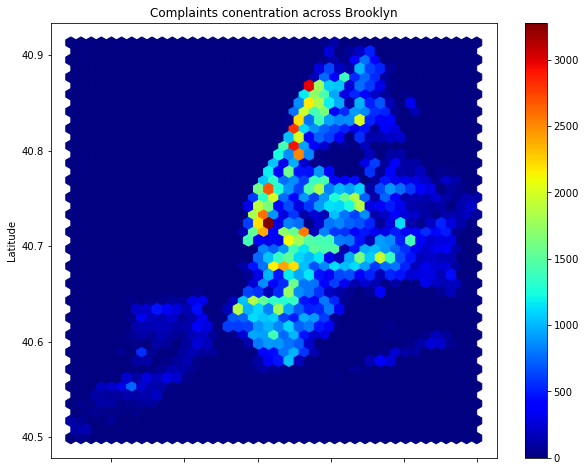

In [27]:
# Draw Hexbin plot showing complaints concentration across Brooklyn 
combined_data[['Longitude', 'Latitude']].plot(kind='hexbin', x = 'Longitude', y = 'Latitude', gridsize = 40, 
        colormap = 'jet', figsize=(10, 8), title = 'Complaints conentration across Brooklyn')

Text(0.5, 0, 'Complaint Type')

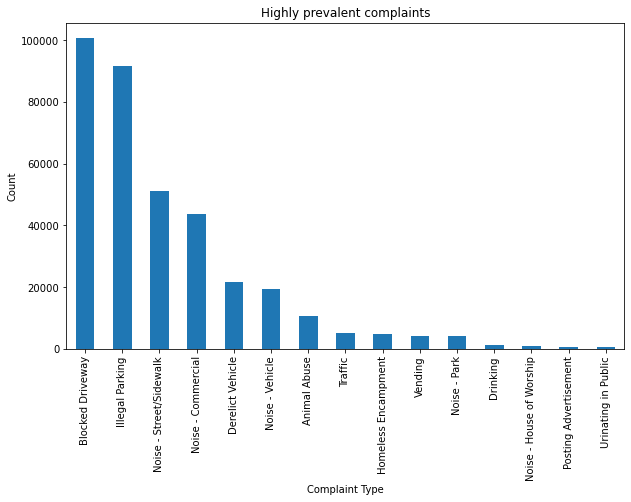

In [28]:
# Frequency plot showing major kinds of complaints

(combined_data['Complaint Type'].value_counts()).head(15).plot(kind = 'bar',
                            figsize=(10, 6), title = 'Highly prevalent complaints')
plt.ylabel('Count')
plt.xlabel('Complaint Type')

In [29]:
# Show the top ten complaints
compliants = combined_data['Complaint Type'].value_counts()

compliants.sort_values(ascending=False, axis = 0, inplace=True)

compliants.head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

It can be seen that the highest complaint was 'Blocked Driveway'

In [30]:
# Visualise the major types of complaints in each city
comps = combined_data.groupby(['City','Complaint Type'])

comps.size().to_frame()

0
City     Complaint Type              
ARVERNE  Animal Abuse              46
         Blocked Driveway          50
         Derelict Vehicle          32
         Disorderly Youth           2
         Drinking                   1
...                               ...
Woodside Blocked Driveway          27
         Derelict Vehicle           8
         Illegal Parking          124
         Noise - Commercial         2
         Noise - Street/Sidewalk    5

[778 rows x 1 columns]

In [31]:
# Visualise the major types if complaints in each city
complaints = comps.size().to_frame().reset_index()
complaints

,City,Complaint Type,0
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
773,Woodside,Blocked Driveway,27
774,Woodside,Derelict Vehicle,8
775,Woodside,Illegal Parking,124
776,Woodside,Noise - Commercial,2


In [32]:
# Visualise the major types of complaints in each city
complaints = complaints.rename(columns={0: 'Count'})
complaints

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
773,Woodside,Blocked Driveway,27
774,Woodside,Derelict Vehicle,8
775,Woodside,Illegal Parking,124
776,Woodside,Noise - Commercial,2


In [33]:
# Visualise the major types of complaints in each city
for i, row in complaints.iterrows():
    print(i, row['City'], row['Complaint Type'], row['Count'])

0 ARVERNE Animal Abuse 46
1 ARVERNE Blocked Driveway 50
2 ARVERNE Derelict Vehicle 32
3 ARVERNE Disorderly Youth 2
4 ARVERNE Drinking 1
5 ARVERNE Graffiti 1
6 ARVERNE Homeless Encampment 4
7 ARVERNE Illegal Parking 62
8 ARVERNE Noise - Commercial 2
9 ARVERNE Noise - House of Worship 14
10 ARVERNE Noise - Park 2
11 ARVERNE Noise - Street/Sidewalk 29
12 ARVERNE Noise - Vehicle 10
13 ARVERNE Panhandling 1
14 ARVERNE Traffic 1
15 ARVERNE Urinating in Public 1
16 ARVERNE Vending 1
17 ASTORIA Animal Abuse 170
18 ASTORIA Bike/Roller/Skate Chronic 16
19 ASTORIA Blocked Driveway 3436
20 ASTORIA Derelict Vehicle 426
21 ASTORIA Disorderly Youth 5
22 ASTORIA Drinking 43
23 ASTORIA Graffiti 4
24 ASTORIA Homeless Encampment 32
25 ASTORIA Illegal Fireworks 4
26 ASTORIA Illegal Parking 1340
27 ASTORIA Noise - Commercial 1653
28 ASTORIA Noise - House of Worship 21
29 ASTORIA Noise - Park 64
30 ASTORIA Noise - Street/Sidewalk 409
31 ASTORIA Noise - Vehicle 236
32 ASTORIA Panhandling 2
33 ASTORIA Posting

Dictionary will be used to track of the biggest complaint

In [34]:
# Visualise the biggest complaint in each city
max_per_city = {}
for i, row in complaints.iterrows():
    City = row['City']
    comptype = row['Complaint Type']
    Count = row['Count']
    
    if City not in max_per_city:
        max_per_city[City] = (None, 0)
        
    max_comptype, max_count = max_per_city[City]
    
    if Count > max_count:
        max_per_city[City] = (comptype, Count)
    

In [35]:
max_per_city

{'ARVERNE': ('Illegal Parking', 62),
 'ASTORIA': ('Blocked Driveway', 3436),
 'Astoria': ('Noise - Commercial', 310),
 'BAYSIDE': ('Illegal Parking', 638),
 'BELLEROSE': ('Blocked Driveway', 138),
 'BREEZY POINT': ('Illegal Parking', 16),
 'BRONX': ('Blocked Driveway', 17062),
 'BROOKLYN': ('Blocked Driveway', 36531),
 'CAMBRIA HEIGHTS': ('Blocked Driveway', 177),
 'CENTRAL PARK': ('Noise - Street/Sidewalk', 105),
 'COLLEGE POINT': ('Blocked Driveway', 597),
 'CORONA': ('Blocked Driveway', 3597),
 'EAST ELMHURST': ('Blocked Driveway', 1925),
 'ELMHURST': ('Blocked Driveway', 1992),
 'East Elmhurst': ('Illegal Parking', 28),
 'FAR ROCKAWAY': ('Blocked Driveway', 383),
 'FLORAL PARK': ('Derelict Vehicle', 74),
 'FLUSHING': ('Blocked Driveway', 3640),
 'FOREST HILLS': ('Blocked Driveway', 873),
 'FRESH MEADOWS': ('Illegal Parking', 1158),
 'GLEN OAKS': ('Illegal Parking', 95),
 'HOLLIS': ('Blocked Driveway', 442),
 'HOWARD BEACH': ('Illegal Parking', 384),
 'Howard Beach': ('Blocked Drive

In [36]:
# Total number of complaints in each city
complaints.groupby('City').size()

City
ARVERNE                17
ASTORIA                20
Astoria                 5
BAYSIDE                15
BELLEROSE              18
BREEZY POINT            8
BRONX                  20
BROOKLYN               21
CAMBRIA HEIGHTS        11
CENTRAL PARK            2
COLLEGE POINT          15
CORONA                 18
EAST ELMHURST          18
ELMHURST               20
East Elmhurst           2
FAR ROCKAWAY           15
FLORAL PARK             9
FLUSHING               20
FOREST HILLS           20
FRESH MEADOWS          14
GLEN OAKS              11
HOLLIS                 14
HOWARD BEACH           17
Howard Beach            1
JACKSON HEIGHTS        19
JAMAICA                20
KEW GARDENS            14
LITTLE NECK            13
LONG ISLAND CITY       18
Long Island City        5
MASPETH                18
MIDDLE VILLAGE         12
NEW HYDE PARK           6
NEW YORK               21
OAKLAND GARDENS        14
OZONE PARK             19
QUEENS                 12
QUEENS VILLAGE         18
REGO PA

In [37]:
# Maximum value of complaints in each city
max_comps = complaints.groupby('City')['Count'].transform(max)
max_comps

0       62
1       62
2       62
3       62
4       62
      ... 
773    124
774    124
775    124
776    124
777    124
Name: Count, Length: 778, dtype: int64

In [38]:
# Visualise the major types of complaints in each city
complaints[complaints['Count'] == max_comps]

,City,Complaint Type,Count
7,ARVERNE,Illegal Parking,62
19,ASTORIA,Blocked Driveway,3436
40,Astoria,Noise - Commercial,310
49,BAYSIDE,Illegal Parking,638
59,BELLEROSE,Blocked Driveway,138
79,BREEZY POINT,Illegal Parking,16
85,BRONX,Blocked Driveway,17062
106,BROOKLYN,Blocked Driveway,36531
125,CAMBRIA HEIGHTS,Blocked Driveway,177
136,CENTRAL PARK,Noise - Street/Sidewalk,105


In [39]:
# Sorting the complaints of each city
complaints_data = complaints[complaints['Count'] == max_comps]

complaints_data_sorted = complaints_data.sort_values(ascending=False, axis = 0, by = 'Count')
complaints_data_sorted

,City,Complaint Type,Count
106,BROOKLYN,Blocked Driveway,36531
469,NEW YORK,Noise - Street/Sidewalk,22245
85,BRONX,Blocked Driveway,17062
696,STATEN ISLAND,Illegal Parking,6224
236,FLUSHING,Blocked Driveway,3640
352,JAMAICA,Blocked Driveway,3620
153,CORONA,Blocked Driveway,3597
19,ASTORIA,Blocked Driveway,3436
580,RIDGEWOOD,Illegal Parking,2235
757,WOODSIDE,Blocked Driveway,2038


It can be seen that the complaint type of blocked highway was the main issue in Brooklyn and most other places

In [ ]:
# Import required library
import datetime
# Check the average response time across various kinds of complaints
# Convert dates to date time format using date time libarary
combined_data['Created Date'] = pd.to_datetime(combined_data['Created Date'])
combined_data['Closed Date'] = pd.to_datetime(combined_data['Closed Date'])

# Create new colum 'Closing time' in the combined data set
combined_data['Closing Time'] = combined_data['Closed Date'] - combined_data['Created Date']
combined_data.head()

In [44]:
# Creating a new data set that shows time clearly
Data_time = combined_data[['City', 'Complaint Type', 'Closing Time']]
Data_time['DT_hours'] = np.around( (Data_time['Closing Time'].view(np.int64)/(pow(10,9)*3600) ), decimals=2)

#Check wether there is any time variable that is negative so that we can be sure that time range
# between closed time and created time is normal
np.array(Data_time[Data_time['DT_hours'] < 0]).sum()


C:\Users\johns\AppData\Local\Temp/ipykernel_16720/796228828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_time['DT_hours'] = np.around( (Data_time['Closing Time'].view(np.int64)/(pow(10,9)*3600) ), decimals=2)


0

In [45]:
# Check the first five varibles
Data_time.head()

,City,Complaint Type,Closing Time,DT_hours
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:30,0.92
1,ASTORIA,Blocked Driveway,0 days 01:27:13,1.45
2,BRONX,Blocked Driveway,0 days 04:51:34,4.86
3,BRONX,Illegal Parking,0 days 07:45:27,7.76
4,ELMHURST,Illegal Parking,0 days 03:27:44,3.46


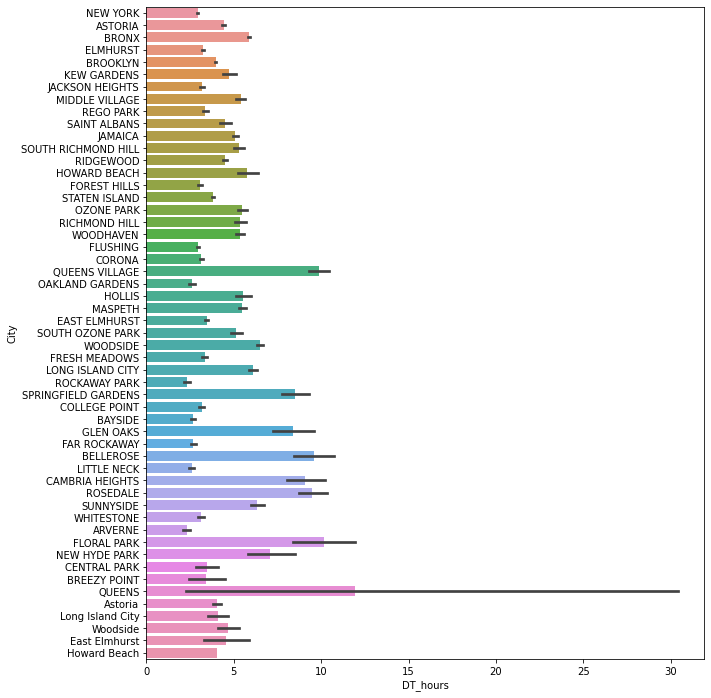

In [56]:
# Plot grapgh showing the time in takes to repospond to cases in each city
plt.figure(figsize=(10,12))
time_res = sns.barplot( y=Data_time['City'], x = Data_time['DT_hours'] )

It can be seen that 'Queens' had the longest response time while 'Arvene' had the shortest reponse time

In [59]:
# Show the average response time
Average_res_time = np.around( (Data_time['DT_hours'].mean()), decimals=2 )
print('Average response time between opening the case and closing:', Average_res_time, 'Hours')

Average response time between opening the case and closing: 4.2 Hours
